In [4]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
import matplotlib.pyplot as plt
import scienceplots

In [53]:
# 問題の設定: ZDT1: 30変数, 2目的
problem = get_problem("zdt1", n_var=30)

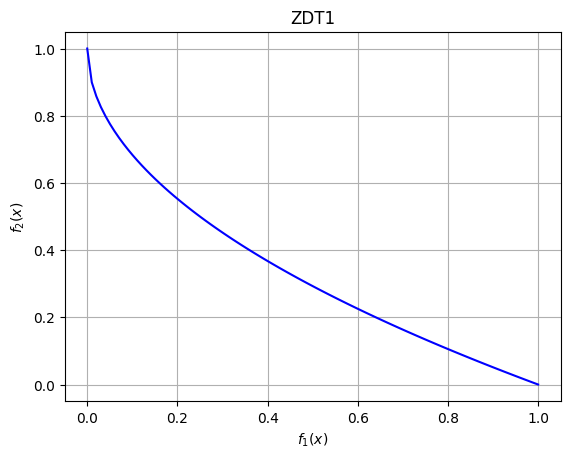

In [54]:
# 問題の可視化
def plot(problem, solv=None, save_name=None):
    if solv is not None:
        plt.scatter(solv.F[:, 0], solv.F[:, 1], color='red')
    ans = problem.pareto_front()
    plt.plot(ans[:, 0], ans[:, 1], color='blue')
    plt.title(problem.name())
    plt.xlabel("$f_1(x)$")
    plt.ylabel("$f_2(x)$")
    plt.grid(True)
    if save_name is not None:
        plt.savefig(save_name)
    plt.show()

plot(problem, save_name="zdt1_pareto_front.png")

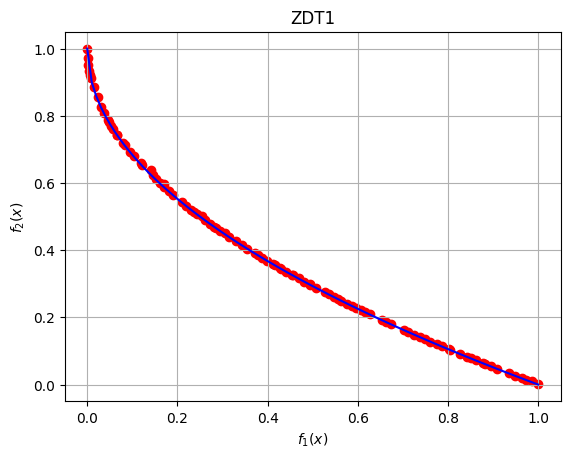

In [55]:
# 最適化の設定
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 300),
               seed=123,
               verbose=False)

# 結果の可視化
plot(problem, res, save_name="zdt1_result.png")

In [56]:
# 評価の取得
import numpy as np
test_x = np.random.rand(10, 30) # 10個の解を生成
evals = problem.evaluate(test_x) # 評価を取得
print(evals)

[[4.31976952e-03 5.07747168e+00]
 [4.46023407e-01 4.20280669e+00]
 [3.14631202e-01 4.15662568e+00]
 [2.34244936e-01 4.46386706e+00]
 [9.13039967e-02 4.79785076e+00]
 [9.47929246e-01 3.62049954e+00]
 [9.24193284e-01 2.28930924e+00]
 [8.22912957e-01 3.58495829e+00]
 [1.00794184e-01 4.69766736e+00]
 [9.64401430e-01 2.72947904e+00]]
